<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/NN/NN_007_single_neuron_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [0]:
# generate two datasets
X,y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(3000, 2)
(3000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


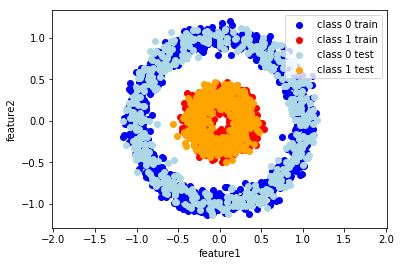

Shape of X_train set is 2 x 2000.
Shape of X_test set is 2 x 1000.
Shape of y_train set is 1 x 2000.
Shape of y_test set is 1 x 1000.


In [0]:
# make a training and a test 
X0 = []
X1 = []
for i in range(len(y)):
    if y[i] == 0:
        X0.append(X[i,:]) 
    else:
        X1.append(X[i,:])
            
X0_np = np.array(X0)
X1_np = np.array(X1)

X0_train = X0_np[:1000,:].T # we want X to be made of examples which are stacked horizontally that why we transpose
X0_test = X0_np[1000:,:].T
X1_train = X1_np[:1000,:].T
X1_test = X1_np[1000:,:].T

X_train = np.hstack([X0_train,X1_train]) # all training examples - from class 0 and from class 1
# the first 1000 examples are from class 0 (so they have lable 0)
y_train=np.zeros((1,2000))
# and the last 1000 are from class 1 (so they have label 1)
y_train[0, 1000:] = 1
X_test = np.hstack([X0_test,X1_test]) # all test examples - from class 0  and from class 1

# test set has 1000 examples, the first 500 are from calss 0 and the last 500 are from calss 1
y_test=np.zeros((1,1000))
y_test[0, 500:] = 1

# plot classes
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'b', label = 'class 0 train')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'r',  label = 'class 1 train')
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

# we will plot shapes of training and test set to make sure that they were made by stacking examoles horizontally
# so in every column of these matrices there is one examples
# in two rows there are features (feature1 is ploted on the x-axis, and feature2 is ploted on the y-axis)
print('Shape of X_train set is %i x %i.'%X_train.shape)
print('Shape of X_test set is %i x %i.'%X_test.shape)
# labels for these examples are in y_train and y_test
print('Shape of y_train set is %i x %i.'%y_train.shape)
print('Shape of y_test set is %i x %i.'%y_test.shape)

In [0]:
def sigmoid(z):  
    s=1/(1+np.exp(-z))
    return s

In [0]:
def single_neuron(w, b, X, Y):
    
    m = X.shape[1] # number of training examples
    
    A = sigmoid(np.dot(w.T, X) + b)  # compute activations for all examples in the set 
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        
        # we will repeate calculations that ocurre in a single neuron to provide our algorithm to learn parameters w and b
        grads, cost = single_neuron(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        
        # Record the costs
        costs.append(cost)
        
    # when for loop ends up we will save the final values of w and b in a dictionary
    params = {"w": w,
              "b": b}
    
    return params, costs

In [0]:
# we need to initialize w and b
w = np.random.randn(X_train.shape[0],1)*0.01
b=0
param_w_b, costs = optimize(w, b, X_train, y_train, num_iterations= 10000, learning_rate = 0.09)

Text(0.5,1,'Cost function')

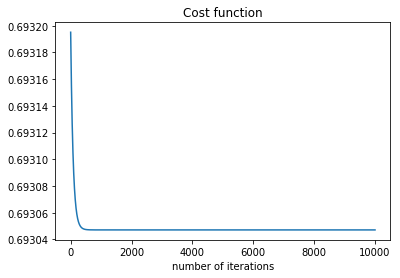

In [0]:
plt.plot(costs)
plt.xlabel('number of iterations')
plt.title('Cost function')

In [0]:
# check the shape of parameters
# param_w_b is a dictionary which contains parameters w and b
# print shape of these parameters
print(param_w_b['w'].shape)
print(param_w_b['b'].shape)

(2, 1)
()


In [0]:
def make_predictions(w, b, X):
    
    m = X.shape[1]
    Y_predictions = np.zeros((1, m))
    
    
    A = sigmoid(np.dot(w.T, X) + b) 
    
    for i in range(A.shape[1]):
        Y_predictions[0, i] = 1 if A[0, i] > 0.5 else 0
        
    
    assert(Y_predictions.shape == (1, m)) # assert is a way we care on matrix dimensions
    
    return Y_predictions

In [0]:
# make predictions on both training set and test set
Y_predictions_train = make_predictions(param_w_b['w'], param_w_b['b'], X_train)
Y_predictions_test = make_predictions(param_w_b['w'], param_w_b['b'], X_test)

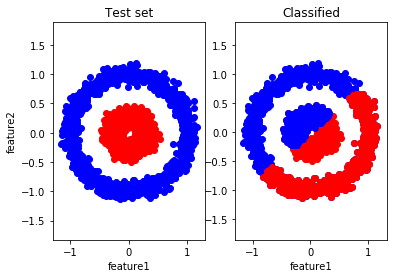

train accuracy: 49.85000000000001 %


In [0]:
# make some plots to see how algorithm works on training set, so on examples that had been seen

plt.subplot(1,2,1)
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'Blue', label = 'class 0 test')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'Red', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Test set')
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'Blue', label = 'class 0 test')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'Red', label = 'class 1 test')
for i in range(0,1000):
    if Y_predictions_train[0,i] == 1 :
        plt.scatter(X_train[0,i],X_train[1,i], color = 'Red')
for i in range(1000,2000):
    if Y_predictions_train[0,i] == 0 :
        plt.scatter(X_train[0,i],X_train[1,i], color = 'Blue')
        
plt.xlabel('feature1')
plt.title('Classified')
plt.axis('equal')
plt.show()
 
# print the accuracy on the training set
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predictions_train - y_train)) * 100))

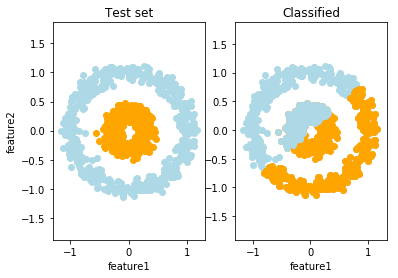

test accuracy: 49.7 %


In [0]:
# make some plots to see how algorithm works on unseen data

plt.subplot(1,2,1)
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.ylabel('feature2')
plt.xlabel('feature1')
plt.title('Test set')
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
for i in range(0,500):
    if Y_predictions_test[0,i] == 1 :
        plt.scatter(X_test[0,i],X_test[1,i], color = 'Orange')
for i in range(500,1000):
    if Y_predictions_test[0,i] == 0 :
        plt.scatter(X_test[0,i],X_test[1,i], color = 'LightBlue')
        
plt.xlabel('feature1')
plt.axis('equal')
plt.title('Classified')
plt.show()

print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predictions_test - y_test)) * 100))